## **<u>Credit Card Fraud Detection</u>**
- With the online transactions we see that the frauds being committed using the credit cards are also on rise.

- Manual verification on each and every transaction is very hard, so we can take help of Machine Learning where we train models to predict what transactions could be fraud.

- In this project we will predict fraudulent credit card transactions with the help of Machine learning models

- This dataset contains transactions that occurred in two days, where we have <b>492 frauds</b> out of <b>284,807</b> transactions. The dataset is highly unbalanced, the positive class (frauds) account for<b>0.172%</b> of all transactions.

- Due to confidentiality input variables are transformed into numerical using PCA transformations.

## <b><u>Steps Taken</u></b>
<br>

1. <b><u>EDA:-</u></b>
- Performing Univariate Analysis, Bi-Variate Analysis, New Feature preparation, Outlier Treatment, Data Imbalance Check, Check corelation.

2. <b><u>Data Preparation:-</u></b>
- Convert features into gaussian,transformations, dropping columns which doesnot add value, Scaling the data.

3. <b><u>Test -Train split-</u></b>:-
- Perform train test split for the dataset to work that would be used for model
training and testing.

4. <b><u>Building models:-</u></b>

 a. Building models on Imabalanced Dataset:
            - Logistic Regression
            - KNN
            - SVM
            - Decision Tree
            - Random Forest            - 
b. Model building with balancing Classes using Below techniques:-

    - Random Oversampling --> Logistic Regression,Decision Tree, XGBoost
    - SMOTEXGBoost --> Logistic Regression,Decision Tree, XGBoost
    - ADASYN --> Logistic Regression,Decision Tree, XGBoost

5. <u><b>Conclusions:-</b></u>
All the Compared models based on the scores of the Recall and AUC metric and accordingly consider the best model that can be recommended to the Buisness to opt for, that would be beneficial to the overall Business.

6. <u><b>Cost-benefit analysis:-</b></u>
It is necessary to determine how much profit or dollar/rupee value we would be saving with the best-selected model that is being built and considered.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Exploratory data analysis

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading from Drive
#df=pd.read_csv("/content/drive/My Drive/creditcard.csv")
# Reading from Csv
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Number of Rows and columns (Rows,Columns)",df.shape)

Number of Rows and columns (Rows,Columns) (284807, 31)


In [ ]:
# To check the unique labels in the credit card columns
for col in df.columns:
    print(col, ': ', len(df[col].unique()), ' labels')

Time :  124592  labels
V1 :  275663  labels
V2 :  275663  labels
V3 :  275663  labels
V4 :  275663  labels
V5 :  275663  labels
V6 :  275663  labels
V7 :  275663  labels
V8 :  275663  labels
V9 :  275663  labels
V10 :  275663  labels
V11 :  275663  labels
V12 :  275663  labels
V13 :  275663  labels
V14 :  275663  labels
V15 :  275663  labels
V16 :  275663  labels
V17 :  275663  labels
V18 :  275663  labels
V19 :  275663  labels
V20 :  275663  labels
V21 :  275663  labels
V22 :  275663  labels
V23 :  275663  labels
V24 :  275663  labels
V25 :  275663  labels
V26 :  275663  labels
V27 :  275663  labels
V28 :  275663  labels
Amount :  32767  labels
Class :  2  labels


In [ ]:
df.describe([0.25,0.30,0.45,0.50,0.60,0.75,0.90,0.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
30%,60776.000000,-7.472943e-01,-4.363931e-01,-6.168060e-01,-6.962262e-01,-5.444552e-01,-6.678449e-01,-4.260203e-01,-1.581584e-01,-5.021651e-01,-4.257577e-01,-6.129743e-01,-2.719676e-01,-4.971726e-01,-3.124565e-01,-4.385696e-01,-3.429957e-01,-3.969463e-01,-3.856909e-01,-3.451006e-01,-1.787040e-01,-1.878180e-01,-4.344265e-01,-1.261571e-01,-2.635025e-01,-2.583651e-01,-2.744373e-01,-5.423468e-02,-4.026708e-02,8.910000,0.000000
45%,78622.000000,-2.618417e-01,-4.453593e-02,2.481334e-05,-1.968808e-01,-1.695250e-01,-3.742544e-01,-5.177829e-02,-2.250332e-02,-1.514378e-01,-1.739052e-01,-1.748496e-01,4.519843e-02,-1.253597e-01,-3.314850e-02,-6.765259e-02,-3.024361e-02,-1.495490e-01,-9.405515e-02,-8.149008e-02,-9.233162e-02,-6.696789e-02,-9.136922e-02,-3.784026e-02,1.287300e-03,-5.831401e-02,-1.091122e-01,-1.214176e-02,1.825315e-03,16.990000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
60%,120396.000000,1.035107e+00,3.027378e-01,4.970396e-01,2.848562e-01,1.866249e-01,-4.819964e-02,2.135123e-01,1.204889e-01,1.761695e-01,5.950018e-02,2.678527e-01,3.247704e-01,2.287273e-01,2.163083e-01,2.719566e-01,2.415156e-01,1.048739e-01,1.820904e-01,1.679275e-01,4.307150e-03,5.038722e-02,2.005957e-01,4.484023e-02,1.664115e-01,1.586211e-01,8.611185e-02,2.922621e-02,2.692801e-02,37.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.53

In [ ]:
#Checking the datatype and meta information
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

In [ ]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['No of Missing Values', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
No of Missing Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <u>OBSERVATION 01</U>:- From the above we dont see any missing values in any column in the Dataset.

In [ ]:
df_outlier=df[df.columns]

Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1

((df_outlier < (Q1 - 1.5 * IQR)) | (df_outlier > (Q3 + 1.5 * IQR))).sum()

Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64

### Distribution of classes

In [ ]:
transaction_classes=df['Class'].value_counts()
genuine_share=round(transaction_classes[0]/df['Class'].count()*100,2)
fraudulent_share=round(transaction_classes[1]/df['Class'].count()*100, 2)
genuine_share, fraudulent_share

(99.83, 0.17)

In [ ]:
transaction_classes

0    284315
1       492
Name: Class, dtype: int64

#### <u>OBSERVATION 02</U>:- The dataset is very imbalanced. Only 492 records are there among 284807 records which are labeld as fradudulent.

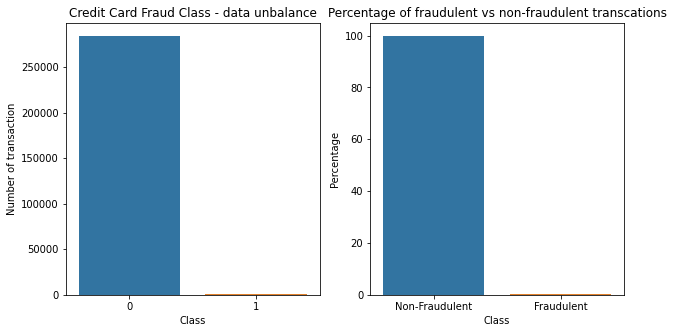

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[genuine_share, fraudulent_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

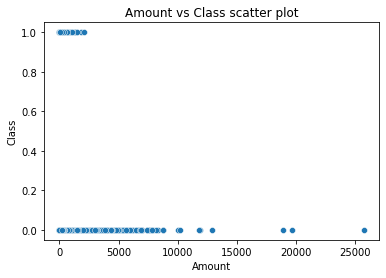

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

#### <u>OBSERVATION 03</U>:- Low amount transactions are likely to be fraudulent than high amount transaction.

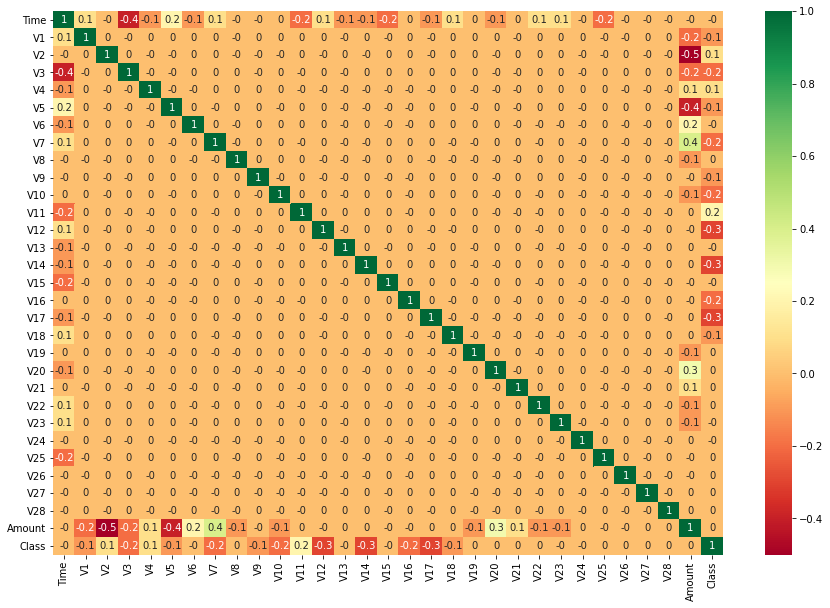

In [ ]:
# Checking the correlation among features using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(method ='pearson'),1),annot=True,cmap='RdYlGn')
plt.show()

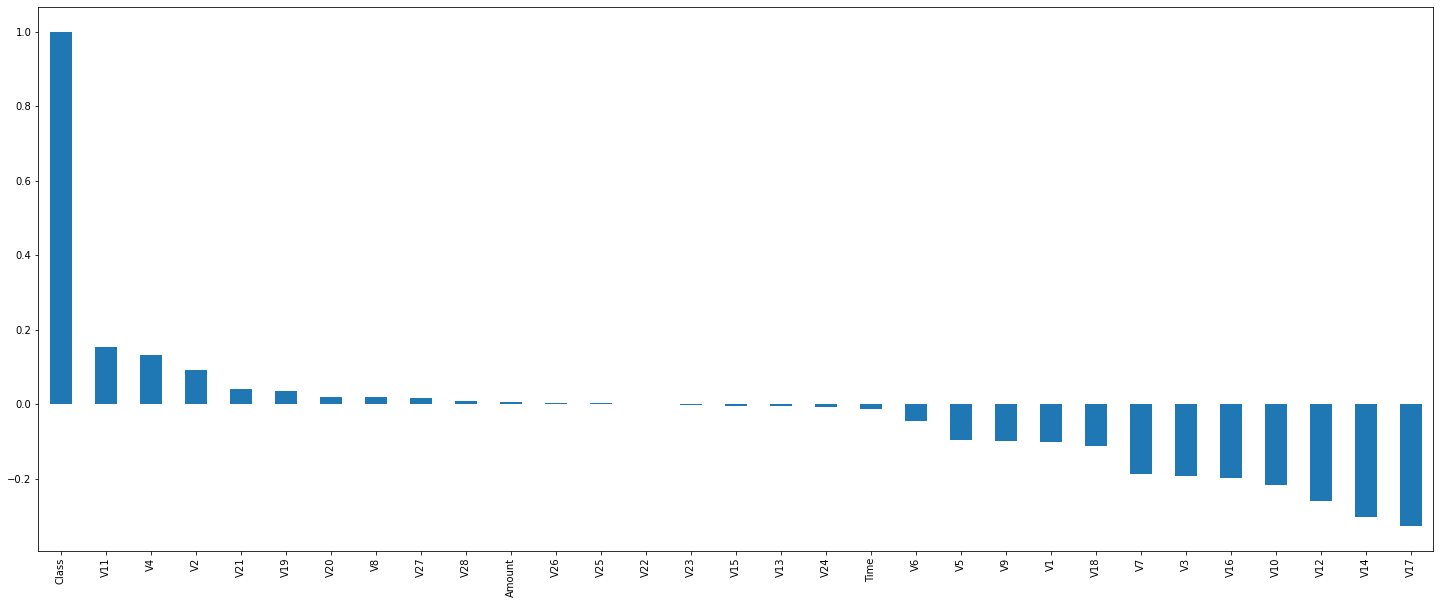

In [ ]:
plt.figure(figsize=(25,10))
df.corr()['Class'].sort_values(ascending = False).plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

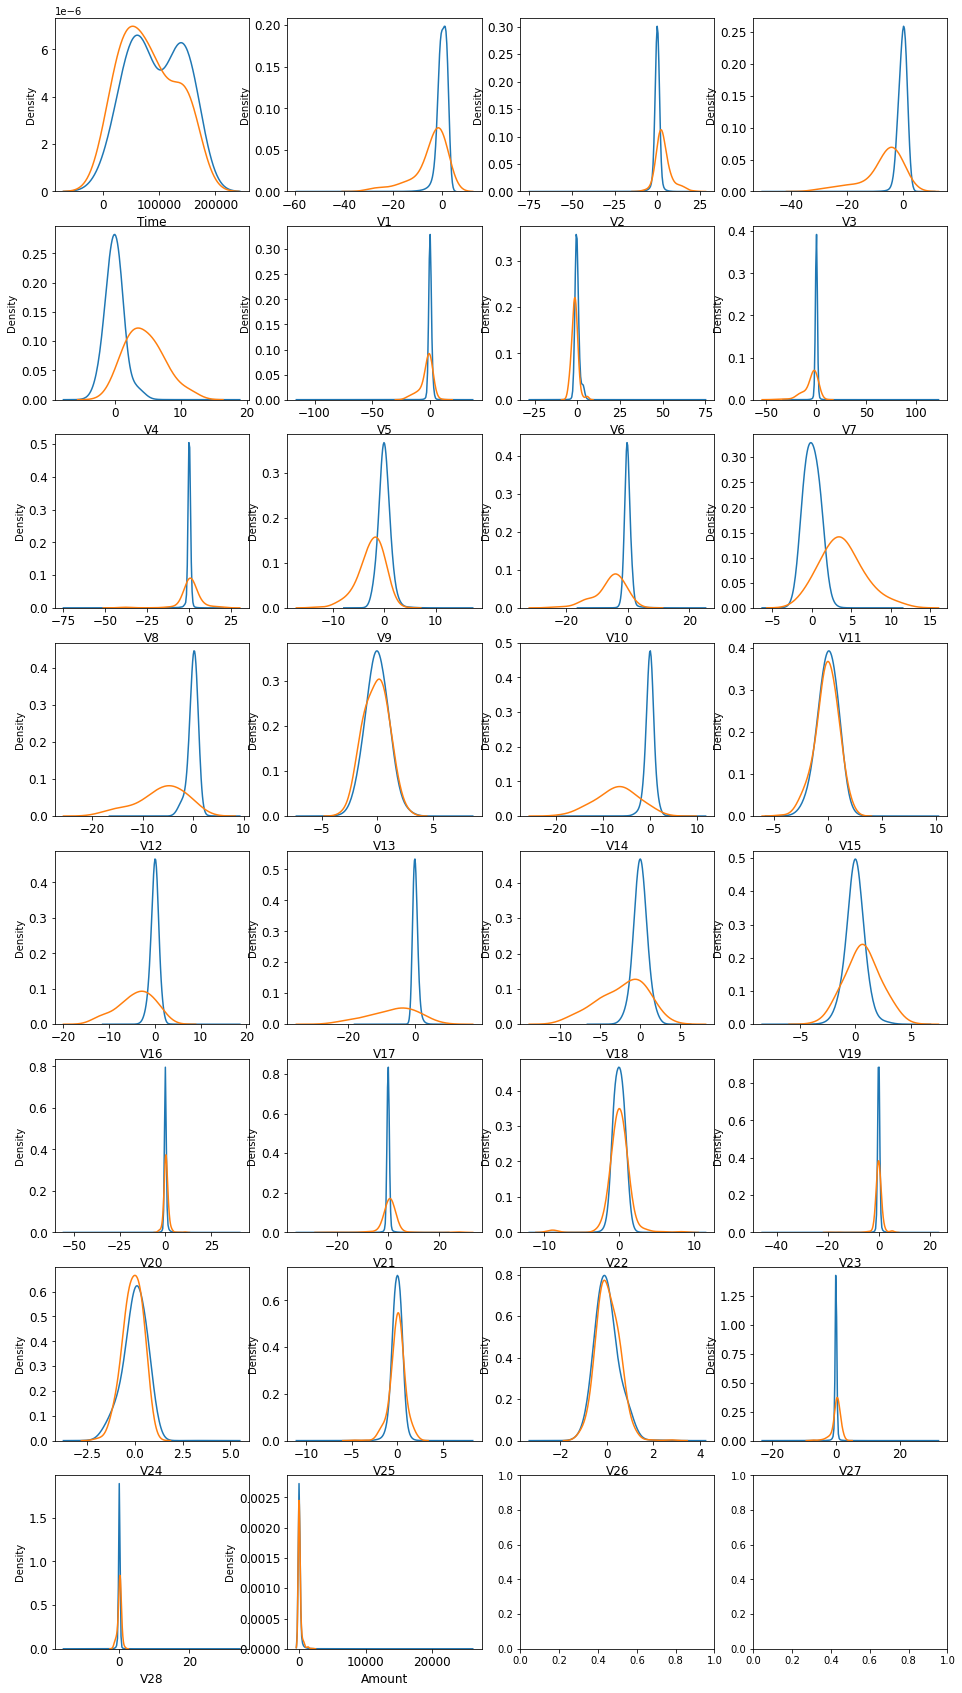

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")
i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,30))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### <u>OBSERVATION 04</U>:- Most of the features distributions are overlapping for both the fraud and non-fraudlent transactions.

In [ ]:
# Dropping Time columns
df01=df.copy()
df01 = df01.drop("Time", axis = 1)

####  Scaling using Standard Scaler

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()
# Scaling the train data
df01[["Amount"]] = scaler.fit_transform(df01[["Amount"]])
# Transforming the test data
df01[["Amount"]] = scaler.transform(df01[["Amount"]])

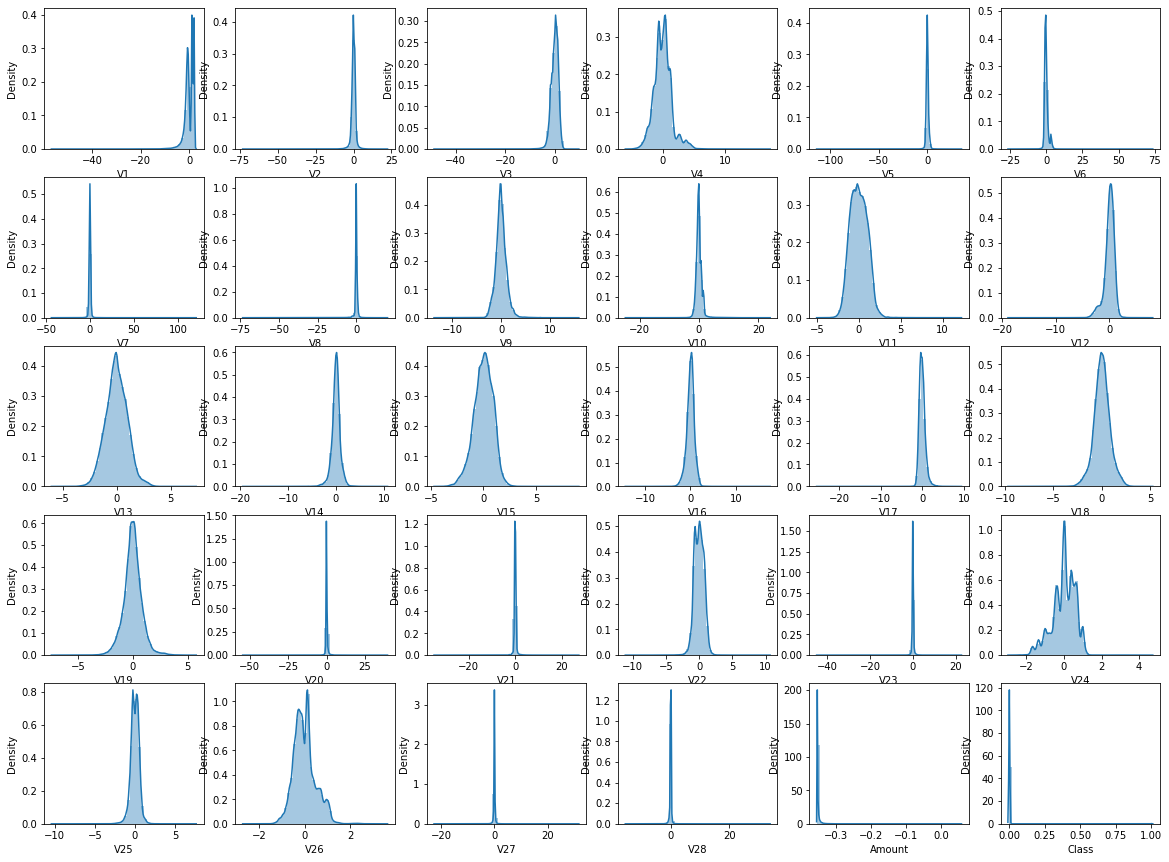

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
var = df01.columns
plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(df01[col])
plt.show()

In [ ]:
# Checking the skewness of the features
var = df01.columns
skew_list = []
for i in var:
    skew_list.append(df01[i].skew())
tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
# dropping class
tmp.drop(["Class"], inplace = True)
tmp
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.280667,-4.624866,-2.240155,0.676292,-2.425901,1.826581,2.553907,-8.521944,0.55468,1.187141,0.356506,-2.278401,0.065233,-1.995176,-0.308423,-1.100966,-3.844914,-0.25988,0.109192,-2.037155,3.592991,-0.213258,-5.87514,-0.552499,-0.415793,0.576693,-1.170209,11.192091,16.977724


In [ ]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount'],
      dtype='object', name='Features')

### <u>OBSERVATION 05</u>:- There is skewness present in the distribution of the above features:- 
- Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian

In [ ]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df01=clean_dataset(df01)

# preprocessing.PowerTransformer(copy=False) to fit & transform 
pt = PowerTransformer(copy=False)
# Fitting the power transformer in train data
df01[skewed] = pt.fit_transform(df01[skewed])

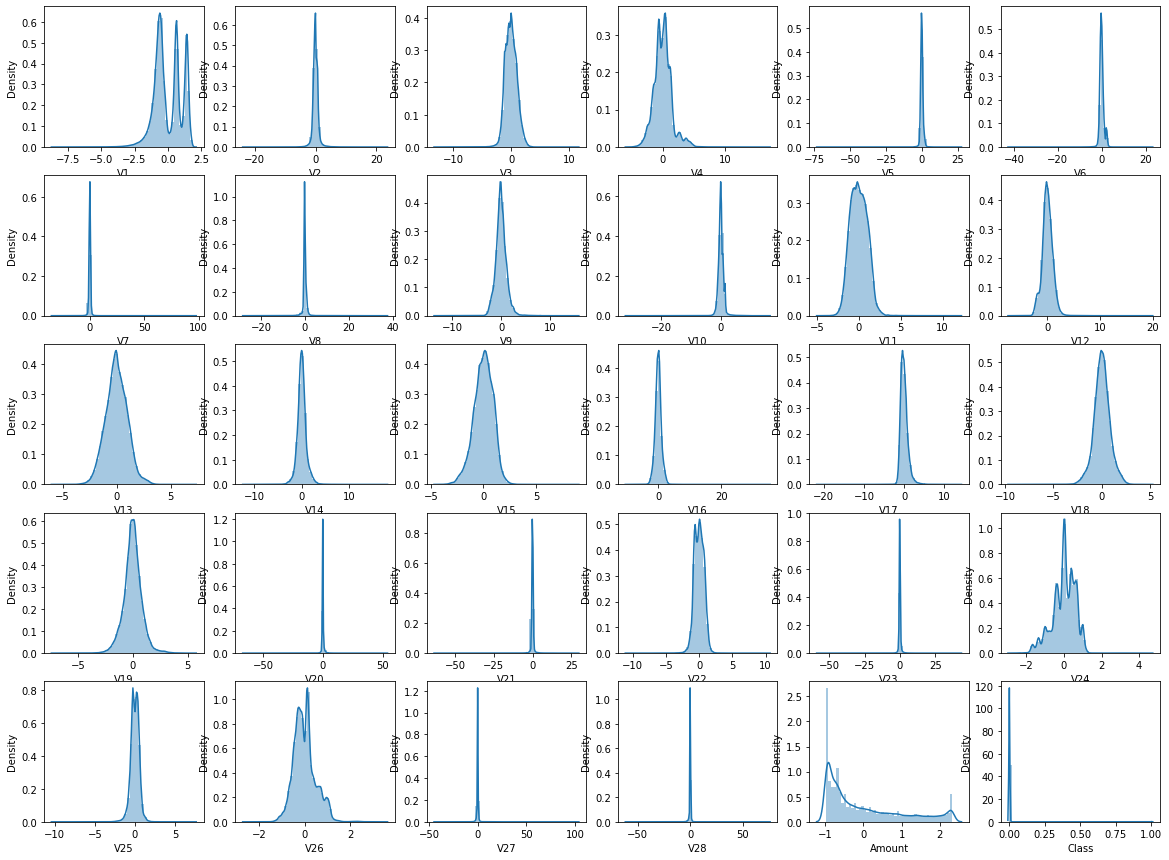

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
var = df01.columns
plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(df01[col])
plt.show()

### Splitting the data into train & test data

In [ ]:
df02=df01.copy()
y= df02["Class"]
X = df02.drop("Class", axis = 1)

In [ ]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492.0
394.0
98.0


# <b><u>Building Model Using Imbalanced Data</u></b>
We are going to build models on below mentioned algorithms and we will compare for the best model.

- Logistic Regression
- K Nearest Neighbours
- SVM
- Decision Tree
- XGBoost

### Metric selection on imbalance data
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

In [ ]:
# Checking the imbalance on Training data
y_train.value_counts()/y_train.shape

0.0    0.998271
1.0    0.001729
Name: Class, dtype: float64

### 1.<b><u>Logistic Regression</u></b>

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)
#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.7s finished


Best ROC AUC score:  0.9806328738803725
Best hyperparameters:  {'C': 0.01}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.049296,0.039195,0.026346,0.000315,0.01,{'C': 0.01},0.968547,0.987376,0.991868,0.972596,0.982777,0.980633,0.008797,1,0.986658,0.981955,0.980696,0.986469,0.981568,0.983469,0.002560
1,1.588989,0.045709,0.027096,0.001657,0.1,{'C': 0.1},0.970010,0.982923,0.988944,0.965087,0.979807,0.977354,0.008669,2,0.983494,0.978896,0.978087,0.985175,0.979418,0.981014,0.002795
2,1.837265,0.074310,0.027076,0.001403,1,{'C': 1},0.971092,0.981847,0.987681,0.963171,0.978340,0.976426,0.008531,3,0.982327,0.977885,0.977426,0.984700,0.978693,0.980206,0.002832
3,1.919339,0.130690,0.027727,0.000206,10,{'C': 10},0.971273,0.981710,0.987522,0.962941,0.978133,0.976316,0.008512,4,0.982172,0.977753,0.977354,0.984641,0.978598,0.980104,0.002836
4,1.878575,0.147349,0.027830,0.001695,100,{'C': 100},0.971295,0.981699,0.987510,0.962922,0.978101,0.976305,0.008510,6,0.982155,0.977741,0.977348,0.984634,0.978590,0.980094,0.002836
5,1.838322,0.075250,0.025331,0.004077,1000,{'C': 1000},0.971299,0.981696,0.987509,0.962923,0.978108,0.976307,0.008509,5,0.982153,0.977739,0.977347,0.984634,0.978589,0.980092,0.002836


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

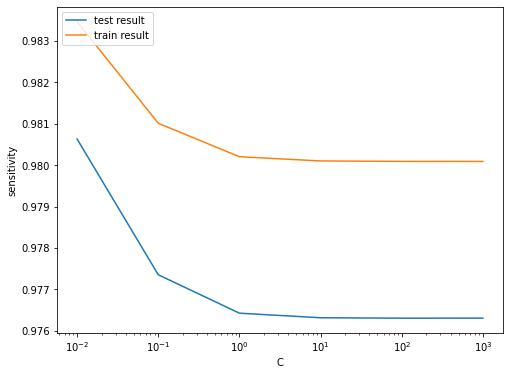

In [ ]:
# plotting of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

In [ ]:
# Creating function to show ROC-AUC score, f1 score and classification report

def show_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [ ]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)
show_scores(y_train, y_train_pred)

F1 Score: 73.19%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227451
         1.0       0.90      0.62      0.73       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

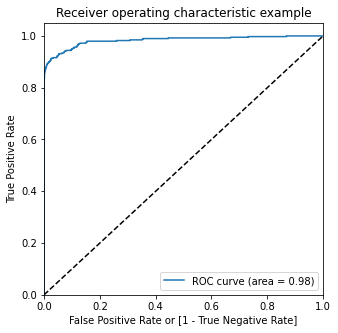

In [ ]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

F1 Score: 68.71%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



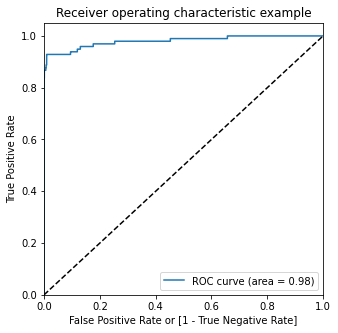

In [ ]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
show_scores(y_test, y_test_pred)

# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### <b> Model Summary </b>
<b>Train set</b>

- ROC : 98%
- F1 Score: 73.19%

<b>Test set</b>

- ROC : 98%
- F1 score: 68.71%

## 2. <b><u>K Nearest Neighbors</u></b>

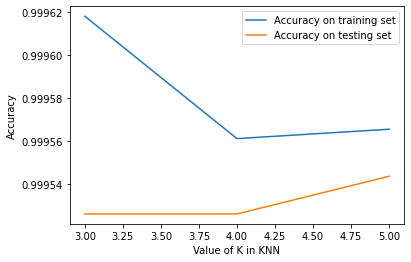

In [ ]:

k_range = range(3, 6)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# From the above when n=5 it's giving good accuray for test and train and hence going with n=5
knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train,y_train)
print('Accuracy of KNN n=5 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))

Accuracy of KNN n=5 on the testing dataset is :1.000


In [ ]:
y_pred_KNN =knn.predict(X_test)
print('BEST K-NEAREST NEIGHBORS MODEL')
print('Accuracy Score - KNN:', metrics.accuracy_score(y_test, y_pred_KNN))  
print('Average Precision - KNN:', metrics.average_precision_score(y_test, y_pred_KNN)) 
print('F1 Score - KNN:', metrics.f1_score(y_test, y_pred_KNN)) 
print('Precision - KNN:', metrics.precision_score(y_test, y_pred_KNN)) 
print('Recall - KNN:', metrics.recall_score(y_test, y_pred_KNN))
print('ROC Score - KNN:', roc_auc_score(y_test, y_pred_KNN))

BEST K-NEAREST NEIGHBORS MODEL
Accuracy Score - KNN: 0.9995435553526912
Average Precision - KNN: 0.7381735448792991
F1 Score - KNN: 0.8555555555555556
Precision - KNN: 0.9390243902439024
Recall - KNN: 0.7857142857142857
ROC Score - KNN: 0.8928131783101535


#### Model Summary

<b>Test set</b>
- Accuracy: 99%
- ROC Score: 89%
- F1 score : 85%

## 3.<b><u>SVM:-</u></b>

In [ ]:
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

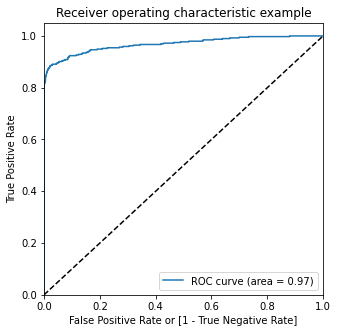

In [ ]:
y_train_pred_proba = svc_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

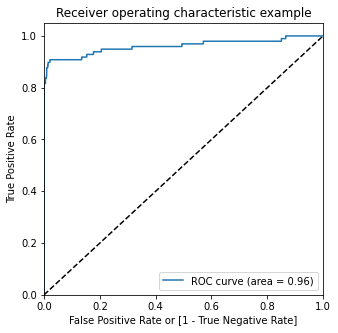

In [ ]:
svc_recall = recall_score(y_test, svc_pred)
svc_recall
svc_pred_prob = svc_model.predict_proba(X_test)[:, 1]
# First, getting the auc score
svc_auc = roc_auc_score(y_test, svc_pred_prob)
# Plot the ROC curve
draw_roc(y_test, svc_pred_prob)

#### Model Summary
<b>Train set</b>

- ROC Score: 97%

<b>Test set</b>

- ROC Score: 96%

## 4. <b><u>Decision Tree</u></b>

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.707329,0.023558,0.039214,0.000456,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.927349,0.951704,0.930559,0.016115,5
1,4.696663,0.031486,0.039404,0.000634,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912633,0.927349,0.951704,0.930562,0.016112,4
2,4.701773,0.026394,0.043191,0.003105,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,2
3,4.646213,0.007751,0.037716,0.001341,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,2
4,9.163740,0.070185,0.044816,0.002905,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.942353,0.923802,0.908236,0.924797,0.013946,7
5,9.181905,0.028480,0.042077,0.000407,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934914,0.923861,0.908224,0.922333,0.010949,8
6,9.136655,0.071015,0.042324,0.001664,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.955817,0.930710,0.915613,0.934047,0.016582,1
7,9.150114,0.041491,0.038379,0.007451,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948450,0.930647,0.908135,0.929077,0.016496,6


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9340466231417847
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### Decision Tree with optimal hyperparameters

In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)
## Prediction on Train set

y_train_pred = dt_imb_model.predict(X_train)
show_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227451
         1.0       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



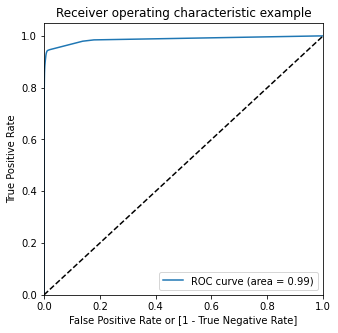

In [ ]:

# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
#Evaluating the model on the test set
y_test_pred = dt_imb_model.predict(X_test)
show_scores(y_test, y_test_pred)

F1 Score: 71.88%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



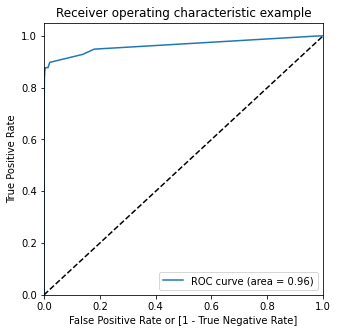

In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
<b>Train set</b>

- ROC Score: 99%
- F1 score : 72.33%

<b>Test set</b>

- ROC Score: 96%
- F1 score : 71.88%

## 5. <b><u>XGBoost</u></b>

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
# Printing best params
model_cv.best_params_
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 11.0min finished


Best roc auc score :  0.9811058879715006
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

F1 Score: 89.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227451
         1.0       0.97      0.83      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



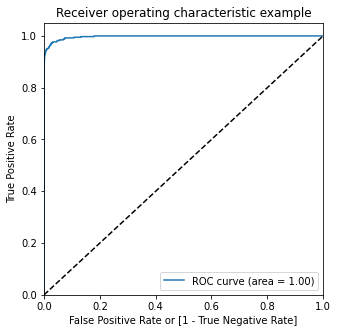

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)
show_scores(y_train, y_train_pred)

# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

### Evaluating the model on the test set

F1 Score: 86.96%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



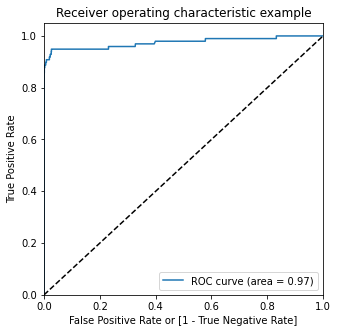

In [ ]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
show_scores(y_test, y_test_pred)
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


##### Model Summary
<b>Train set</b>
- ROC score: 100%
- F1 score: 89.5%

<b>Test set</b>
- ROC score: 97%
- F1 score: 86.96%

### XGBoost model is giving good performance on the unbalanced data among these 3 models. ROC-AUC score on the train data is 100% and on test data 97%.




<b>Printing the important features of the best model to understand the dataset</b>
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


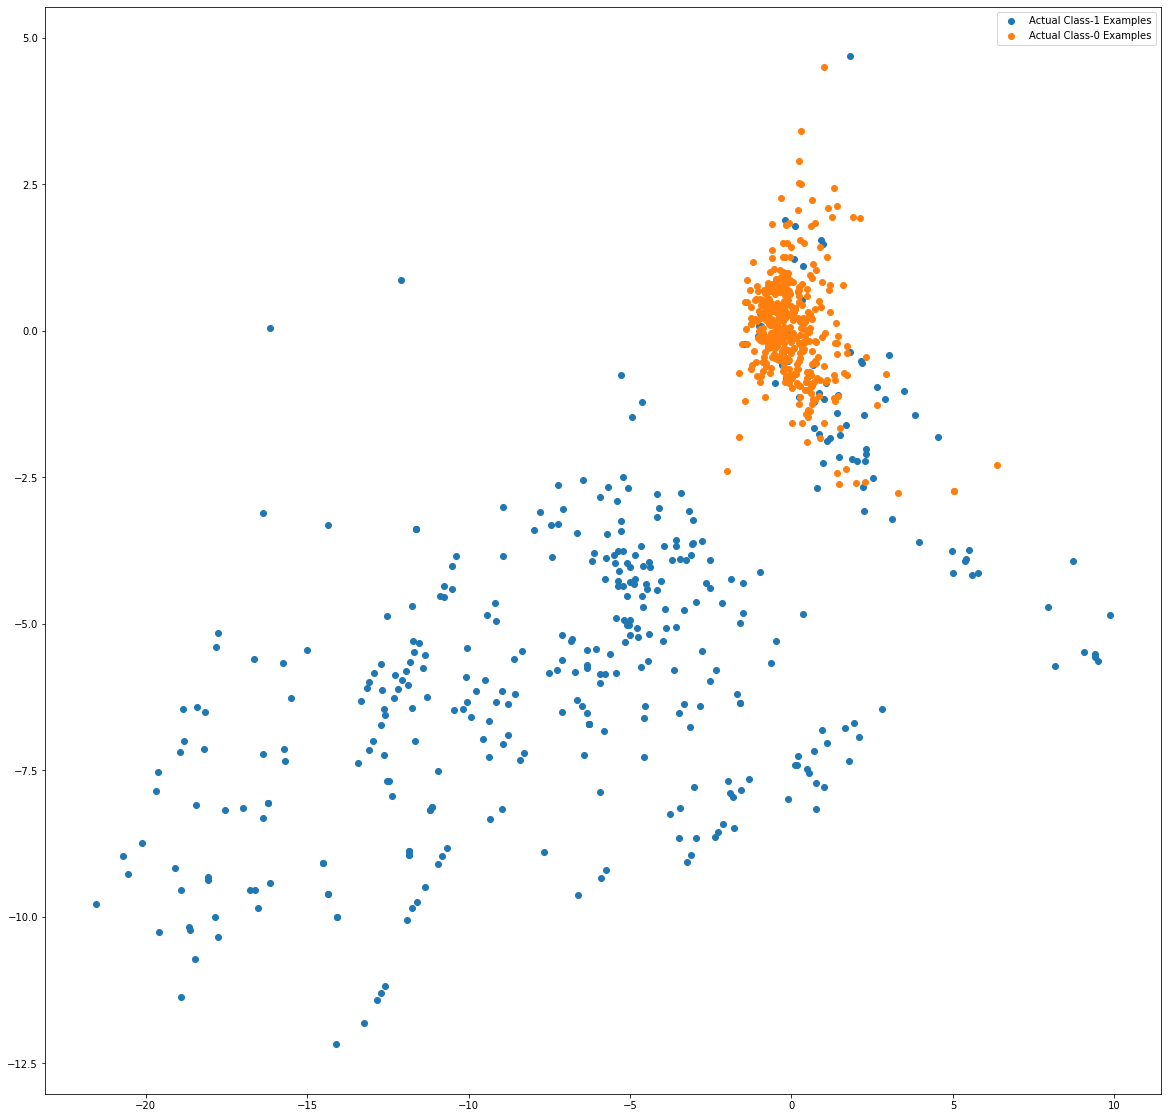

In [ ]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9972034697404675
Threshold= 0.0016353772


# <b><u>Building Model Using Balanced Data</u></b>
We are going to build models on below mentioned algorithms and we will compare for the best model.

- <b>Random Oversampling:-</b>Logistic Regression,Decision Tree & XGBoost
- <b>SMOTE:-</b>Logistic Regression,Decision Tree & XGBoost
- <b>ADASYN:-</b>Logistic Regression,Decision Tree & XGBoost

### <b>Using RandomOverSampler To Balance Data</b>

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Defining oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)

from collections import Counter
# Before the sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distributions after applying RandomOverSampler
print('New class distribution:-',Counter(y_oversample))

Before sampling class distribution:- Counter({0.0: 227451, 1.0: 394})
New class distribution:- Counter({0.0: 227451, 1.0: 227451})


#### 1. <b><u>Logistic Regrassion with Random Oversampling:-</u></b>

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_oversample, y_oversample)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


Best ROC AUC score:  0.9871724961286127
Best hyperparameters:  {'C': 100}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.507489,0.058228,0.047063,0.001432,0.01,{'C': 0.01},0.986871,0.987046,0.987253,0.986983,0.986971,0.987025,0.000127,6,0.987121,0.987022,0.986913,0.987044,0.987082,0.987036,0.000070
1,2.610311,0.075305,0.047455,0.001119,0.1,{'C': 0.1},0.987014,0.987175,0.987385,0.987104,0.987111,0.987158,0.000125,5,0.987248,0.987160,0.987043,0.987177,0.987219,0.987170,0.000071
2,2.704544,0.174603,0.047601,0.002232,1,{'C': 1},0.987027,0.987186,0.987398,0.987115,0.987128,0.987171,0.000124,4,0.987262,0.987174,0.987057,0.987192,0.987235,0.987184,0.000071
3,2.697755,0.252668,0.046964,0.000654,10,{'C': 10},0.987029,0.987187,0.987399,0.987116,0.987131,0.987172,0.000124,3,0.987264,0.987176,0.987058,0.987193,0.987237,0.987185,0.000071
4,2.610631,0.149125,0.046198,0.000122,100,{'C': 100},0.987029,0.987187,0.987400,0.987116,0.987131,0.987172,0.000124,1,0.987264,0.987176,0.987058,0.987193,0.987237,0.987186,0.000071
5,2.638849,0.143860,0.046989,0.000429,1000,{'C': 1000},0.987029,0.987187,0.987400,0.987116,0.987131,0.987172,0.000124,2,0.987264,0.987176,0.987058,0.987193,0.987237,0.987186,0.000071


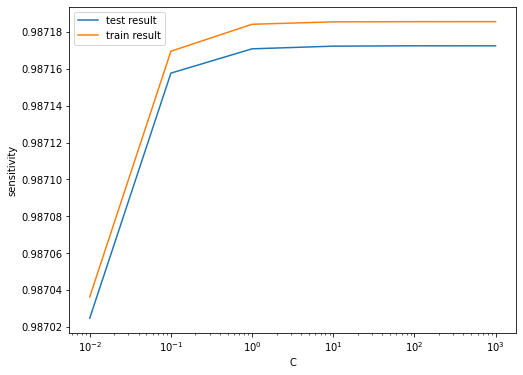

In [ ]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#Logistic Regression with hyperparameter tuning
model_cv.best_params_
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_oversample, y_oversample)

F1 Score: 94.44%
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    227451
         1.0       0.97      0.92      0.94    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



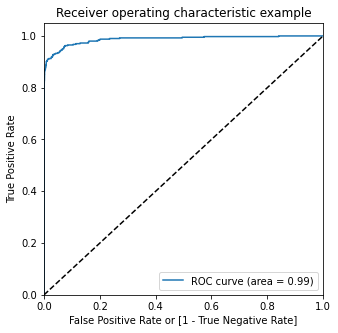

In [ ]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_oversample)

# Printing scores
show_scores(y_oversample, y_train_pred)
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_oversample)[:,1]
# Plot the ROC curve
draw_roc(y_oversample, y_train_pred_proba)

F1 Score: 10.94%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     56864
         1.0       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



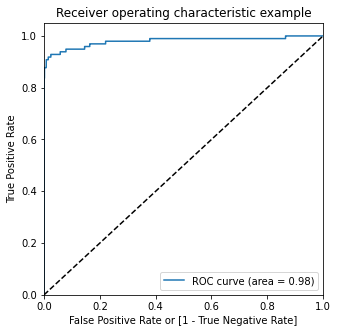

In [ ]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)
# Printing the scores
show_scores(y_test, y_test_pred)
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### <b>Model Summary</b>
<b>Train set</b>
- ROC score : 99%
- F1 score: 94.44%
<br>

<b>Test set</b>
- ROC score : 98%
- F1 score: 10.94%


#### 2. <b><u>Decision Tree with Random Oversampling</u></b>

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_oversample,y_oversample)

# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

# Decision Tree with optimal hyperparameters

dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_oversample, y_oversample)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.8min finished


Best roc auc score :  0.998583364405473
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### <b>Model evatuation on train data</b>

F1 Score: 99.43%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    227451
         1.0       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



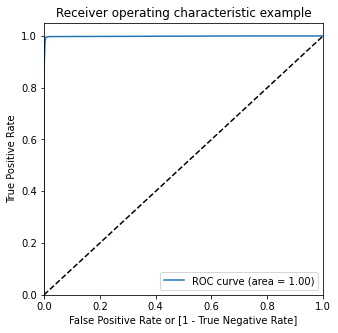

In [ ]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_oversample)
show_scores(y_oversample, y_train_pred)

# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_oversample)[:,1]
# Plot the ROC curve
draw_roc(y_oversample, y_train_pred_proba)


##### <b>Predictions on the test set</b>

F1 Score: 28.67%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     56864
         1.0       0.17      0.82      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.64     56962
weighted avg       1.00      0.99      1.00     56962



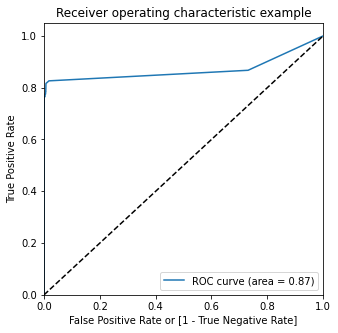

In [ ]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
show_scores(y_test, y_test_pred)

# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### <b>Model Summary</b>
<b>Train set</b>
- ROC score : 100%
- F1 score: 99.43%
<br>

<b>Test set</b>
- ROC score : 87%
- F1 score: 28.67%

#### 3. <b><u>XGBoost with Random Oversampling</u></b>

In [ ]:
X_train_rdos_bal = pd.DataFrame(X_oversample, columns=X_train.columns)
y_train_rdos_bal = pd.DataFrame(y_oversample, columns=['Class'])
#XGB_def =XGBClassifier()
#XGB_def.fit(X_train_rdos_bal,y_train_rdos_bal)
#y_pred_xgb_def =XGB_def.predict(org_Xtest)


# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}   
# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rdos_bal, y_train_rdos_bal)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 22.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
model_cv.best_params_
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_train_rdos_bal, y_train_rdos_bal)

Best roc auc score :  0.9999863031742476
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Evalution on Training Data

F1 Score: 99.71%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    227451
         1.0       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



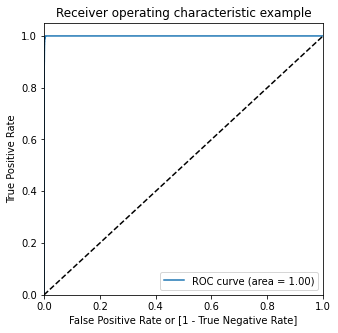

In [ ]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_train_rdos_bal)

show_scores(y_oversample, y_train_pred)
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_train_rdos_bal)[:,1]

# Plot the ROC curve
draw_roc(y_oversample, y_train_pred_proba)

##### Model Evaluation on Test set

F1 Score: 35.34%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     56864
         1.0       0.22      0.90      0.35        98

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.68     56962
weighted avg       1.00      0.99      1.00     56962



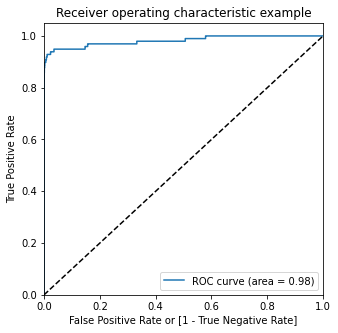

In [ ]:
y_pred = xgb_over_model.predict(X_test)
show_scores(y_test, y_pred)
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### <b>Model Summary</b>
<b>Train set</b>
- ROC score : 100.0%
- F1 score: 99.71%
<br>

<b>Test set</b>
- ROC score : 98%
- F1 score: 35.34%

### <b>SMOTE (Synthetic Minority Oversampling Technique)</b>

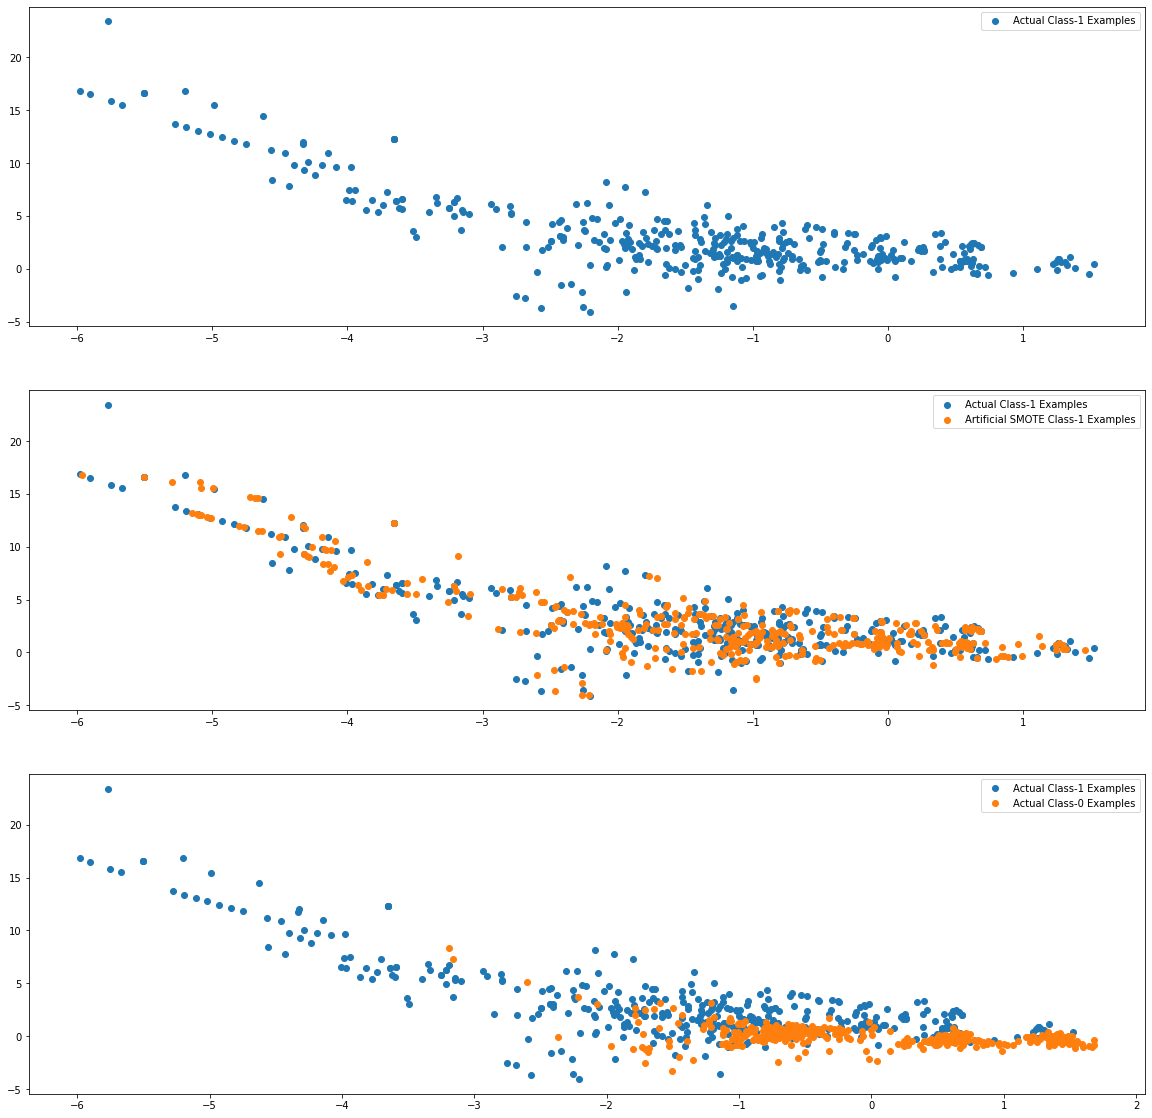

In [ ]:
import pandas as pd
import numpy as np
# Printing the class distribution after applying SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
 #           label='Artificial SMOTE Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')

plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### 1.<b>Logistic Regression on balanced data with SMOTE</b>

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


Best ROC AUC score:  0.9890682209500149
Best hyperparameters:  {'C': 1000}


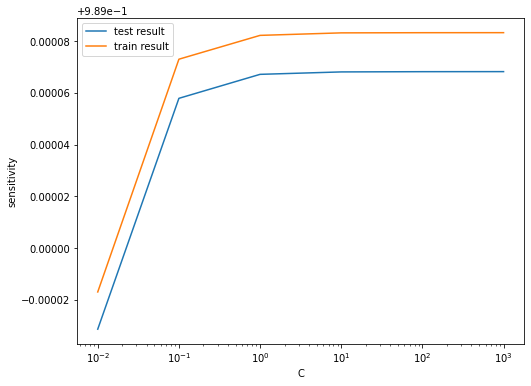

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)

# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
#Logistic Regression with optimal C
# Printing best params
model_cv.best_params_

# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Evaluating the model on train data

F1 Score: 94.26%
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    227451
         1.0       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



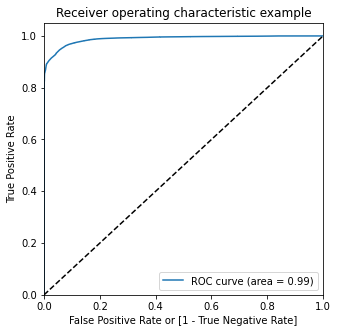

In [ ]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
show_scores(y_train_smote, y_train_pred)


# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluating on test data

F1 Score: 9.96%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     56864
         1.0       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



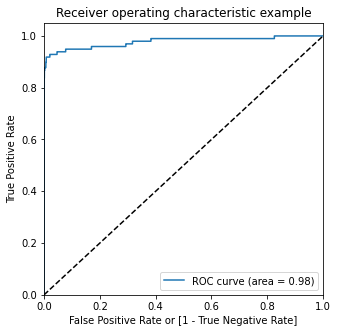

In [ ]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
show_scores(y_test, y_test_pred)

# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

###### Model Summary
<b>Train set</b>
- ROC score : 99%
- F1 score: 94.26%
<br>

<b>Test set</b>
- ROC score : 98%
- F1 score: 9.96%

#### 2. Decision Tree on balanced data with SMOTE

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

grid_search.best_params_


# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

Best roc auc score :  0.9976950485330995
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

#### Evaluating the model on train data

F1 Score: 98.61%
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    227451
         1.0       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



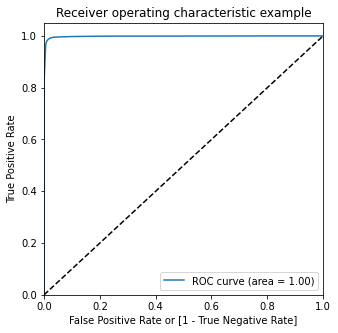

In [ ]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
show_scores(y_train_smote, y_train_pred_smote)

# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)


#### Evaluating the model on the test set

F1 Score: 14.98%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56864
         1.0       0.08      0.85      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



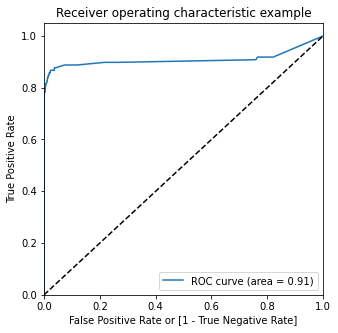

In [ ]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
show_scores(y_test, y_pred)

# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)


#### Model Summary
<b>Train set</b>
- ROC score : 100%
- F1 score: 98.61%

<b>Test set</b>

- ROC score : 91%
- F1 score: 14.98%

#### 3. XGBoost on balanced data with SMOTE

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 40.1min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,99.823004,0.436735,0.909626,0.038487,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999563,0.999629,0.999578,0.999590,0.000028,4,0.999630,0.999636,0.999620,0.999629,0.000007
1,133.974599,1.123017,0.928590,0.051430,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999529,0.999570,0.999548,0.999549,0.000016,5,0.999595,0.999571,0.999596,0.999587,0.000011
2,156.047396,0.601064,0.971484,0.036018,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999519,0.999577,0.999538,0.999544,0.000024,6,0.999586,0.999595,0.999586,0.999589,0.000004
3,99.128303,0.490616,0.918386,0.034064,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999919,0.999945,0.999931,0.999932,0.000011,3,0.999968,0.999971,0.999955,0.999964,0.000007
4,135.977765,2.919486,0.929802,0.054875,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999943,0.999944,0.999938,0.999942,0.000003,1,0.999974,0.999970,0.999967,0.999970,0.000002
5,160.389500,1.656868,0.947083,0.055081,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999937,0.999935,0.999940,0.999938,0.000002,2,0.999970,0.999966,0.999971,0.999969,0.000002


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999415285114078
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### Model with optimal hyperparameter

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

[20:06:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Evaluating the model on the train data

In [ ]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



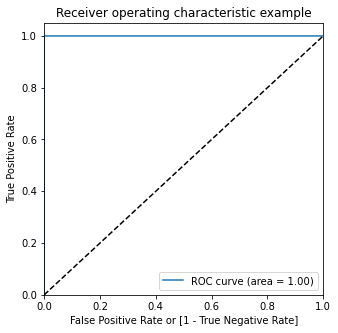

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on test data

In [ ]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 80.95%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



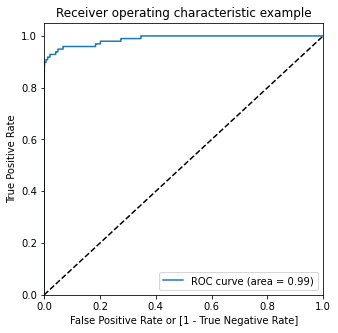

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 99%
    - F1 score: 80.95%

### <b>ADASYN (Adaptive Synthetic Sampling)</b>

- Print the class distribution after applying ADASYN

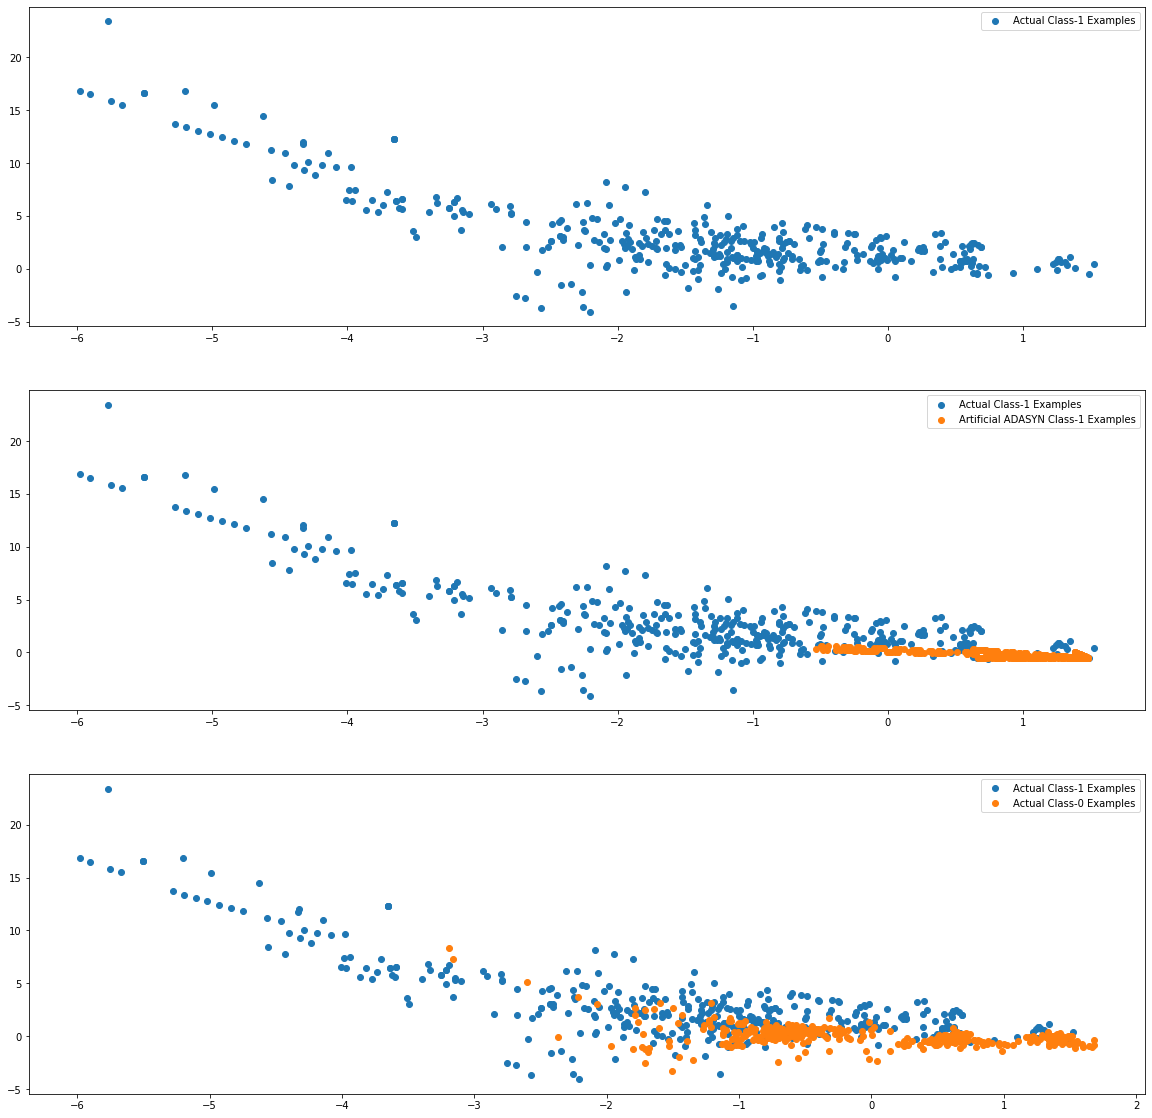

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### <b>1. Logistic Regression on balanced data with ADASYN</b>

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   42.3s finished


Best ROC AUC score:  0.9622177766857201
Best hyperparameters:  {'C': 1000}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.041329,0.134179,0.084786,0.000830,0.01,{'C': 0.01},0.961167,0.962337,0.962441,0.961982,0.000578,6,0.962361,0.961690,0.961978,0.962009,0.000275
1,2.097256,0.083515,0.084846,0.001766,0.1,{'C': 0.1},0.961410,0.962520,0.962662,0.962197,0.000560,5,0.962589,0.961899,0.962194,0.962227,0.000282
2,2.115730,0.092244,0.084486,0.003712,1,{'C': 1},0.961432,0.962534,0.962682,0.962216,0.000558,4,0.962608,0.961917,0.962212,0.962246,0.000283
3,2.122844,0.118204,0.085532,0.004575,10,{'C': 10},0.961434,0.962536,0.962684,0.962218,0.000558,3,0.962610,0.961919,0.962214,0.962247,0.000283
4,2.091530,0.115753,0.081944,0.000452,100,{'C': 100},0.961434,0.962536,0.962684,0.962218,0.000558,2,0.962610,0.961919,0.962214,0.962248,0.000283
5,2.111096,0.131736,0.082985,0.000801,1000,{'C': 1000},0.961434,0.962536,0.962684,0.962218,0.000558,1,0.962610,0.961919,0.962214,0.962248,0.000283


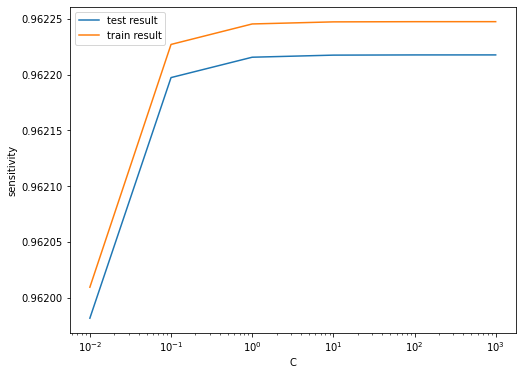

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Logistic Regression with optimal C
model_cv.best_params_
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### <b>Evaluating the model with train data</b>

In [ ]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
show_scores(y_train_adasyn, y_train_pred)

F1 Score: 89.42%
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.90    227451
         1.0       0.90      0.89      0.89    227440

    accuracy                           0.90    454891
   macro avg       0.90      0.90      0.90    454891
weighted avg       0.90      0.90      0.90    454891



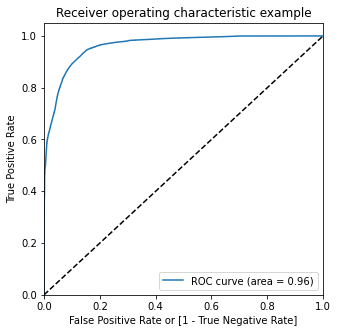

In [ ]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Evaluating on test data

F1 Score: 3.26%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     56864
         1.0       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



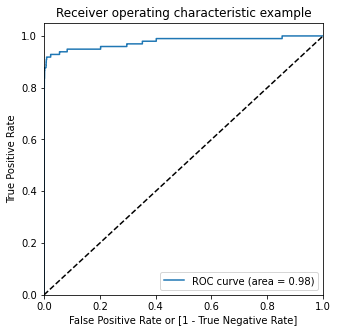

In [ ]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
show_scores(y_test, y_pred)

# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### Model Summary
<b>Train set</b>
- ROC score : 96%
- F1 score: 89.42%

<b>Test set</b>
- ROC score : 98%
- F1 score: 3.26%

#### 2. Decision Tree on balanced data with ADASYN

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

Best roc auc score :  0.9301525225881532
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

#### Evaluating the model on train data

F1 Score: 97.45%
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    227451
         1.0       0.96      0.99      0.97    227440

    accuracy                           0.97    454891
   macro avg       0.97      0.97      0.97    454891
weighted avg       0.97      0.97      0.97    454891



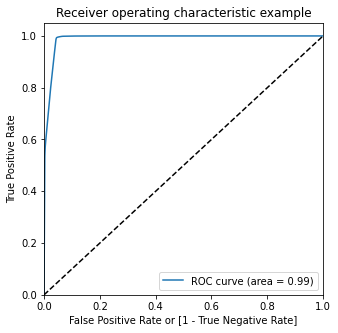

In [ ]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
show_scores(y_train_adasyn, y_train_pred)


# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

F1 Score: 6.27%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.98     56864
         1.0       0.03      0.91      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



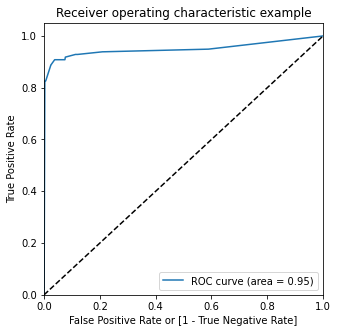

In [ ]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
show_scores(y_test, y_pred)

# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
<b>Train set</b>
- ROC score : 99%
- F1 score: 97.45%

<b>Test set</b>
- ROC score : 95%
- F1 score: 6.27%

#### 3. XGBoost on balanced data with ADASYN

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 37.2min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,92.185108,0.474298,0.863006,0.005172,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.984958,0.968837,0.996349,0.983381,0.011287,4,0.998973,0.999189,0.998847,0.999003,0.000141
1,124.659389,0.468627,0.957078,0.030516,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982246,0.965539,0.996213,0.981333,0.012539,6,0.998978,0.999082,0.998864,0.998975,0.000089
2,148.289523,0.644779,0.932040,0.070337,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982308,0.965918,0.996023,0.981416,0.012307,5,0.998945,0.999170,0.998787,0.998968,0.000157
3,91.636896,1.295446,0.925754,0.026389,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.993719,0.964377,0.998389,0.985495,0.015054,2,0.999933,0.999901,0.999906,0.999913,0.000014
4,124.260863,1.078483,0.949290,0.043354,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.989813,0.961606,0.999055,0.983491,0.015929,3,0.999906,0.999937,0.999913,0.999918,0.000013
5,147.783586,0.865519,0.874294,0.021126,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.992176,0.968188,0.999123,0.986496,0.013253,1,0.999943,0.999917,0.999909,0.999923,0.000015


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9864956674712061
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### Model with optimal hyperparameter

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[21:02:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Evaluating the model on the train data

In [ ]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



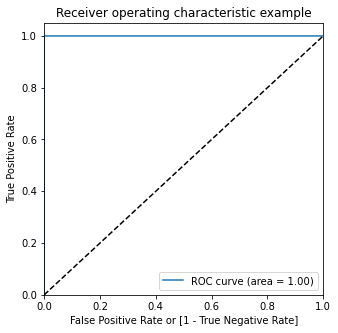

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [ ]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 81.16%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.86      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



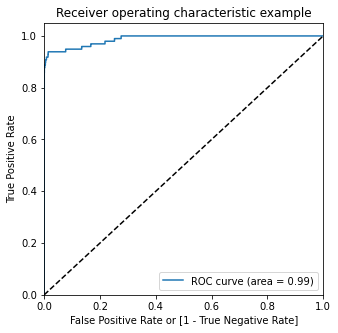

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Model Summary
<b> Train set</b>
- ROC score : 100.0%
- F1 score: 100.0%
    
<b>Test set</b>
- ROC score : 99%
- F1 score: 81.16%


Select the oversampling method which shows the best result on a model
We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 99% on the test data and F1 score 100% on train data and 81% in the test data.

Hence, we conclude that the XGBoost model with Adasyn is the best model.

#### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


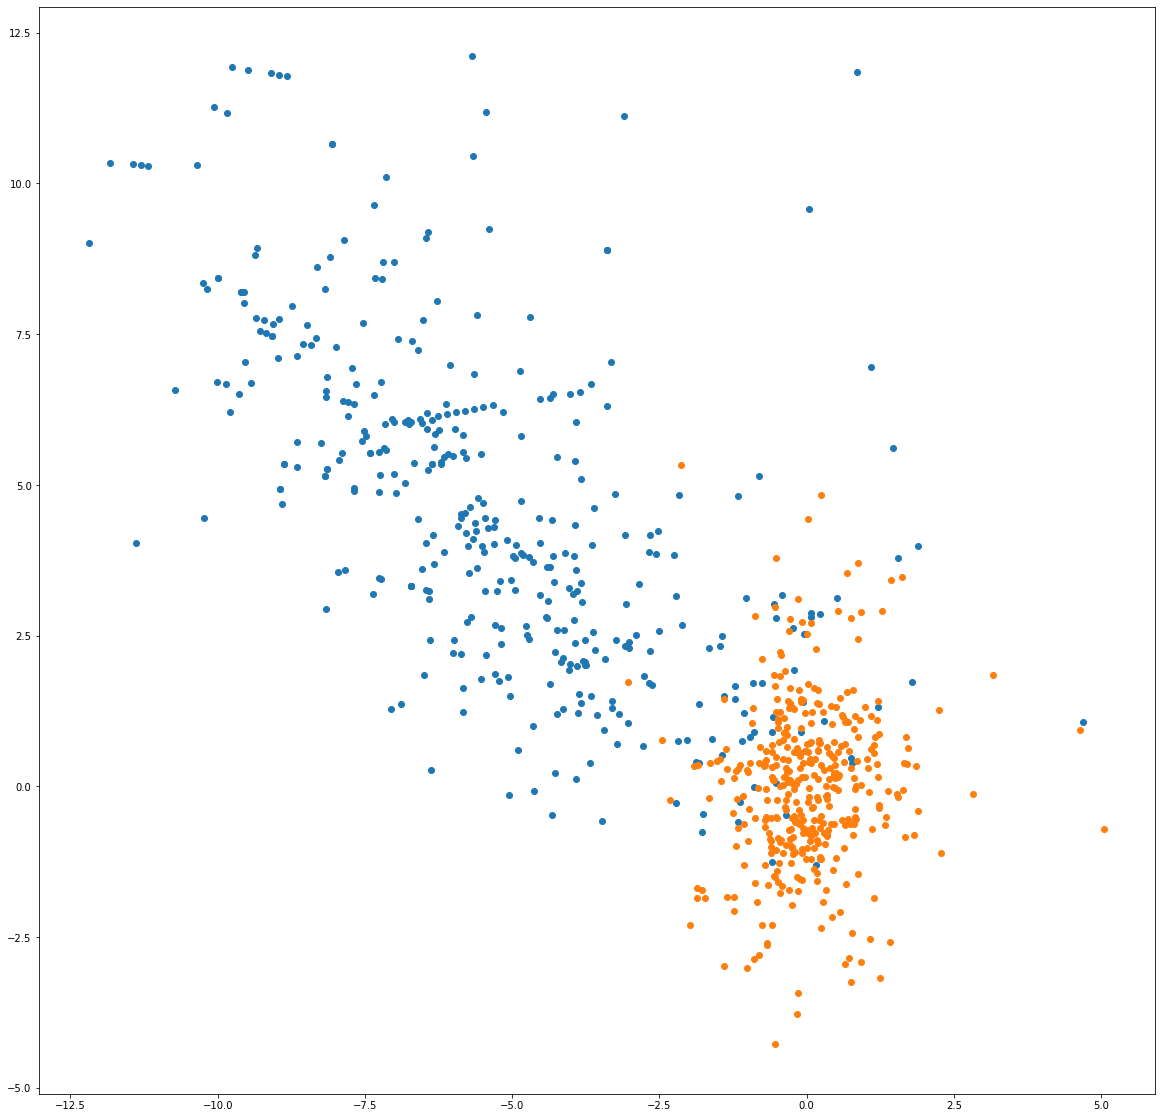

In [ ]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

<b>Print the FPR,TPR & select the best threshold from the roc curve</b>

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.996297544426869
0.49964684


# <b><u>Conclusions</u></b>

- We have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions,

- After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(99%) and also high Recall(86%). Hence, we can go with the XGBoost model here.


### <b><u>Cost Benifiet Analysis</u></b>


In [ ]:
print('Mean amount being transacted in the dataset is :',round(df.Amount.mean(),2))
print('Mean amount being transacted in fraud is :',round(df[df['Class']==1]['Amount'].mean(),2))

Mean amount being transacted in the dataset is : 88.35
Mean amount being transacted in fraud is : 122.21



- We are attaining a 86 % Recall, this means that out of all the Fraudulent Transactions we are able to <b>flag 86 %</b> of them correctly.

- We are actuall saving 86% of the fraud amount to the bank (Approx, as all thr transactions arent of same amount)

In [ ]:
print('The  amount being identified as fraud is :',round(0.86*(df[df['Class']==1]['Amount'].sum()),2))

The  amount being identified as fraud is : 51710.05


- In 2 days bank is able to identify <b>51710.05 Euro/ dollar</b> of fraud and this would also be considered as money saved. 

- Considering the 2 days revenue as average/ normal through out year bank would be saving around <b>9.43 Million per year</b>

- its definetly profitable for Bank to implement this model so that Bank can save money.